In [1]:
# Setup & Imports

RANDOM_SEED = 42

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)

from sklearn.decomposition import PCA

np.random.seed(RANDOM_SEED)

In [2]:
#input
path="smoker_dataset.csv"
df = pd.read_csv(path)

# **EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,38984.0,44.127591,12.063564,20.0,40.0,40.0,55.0,85.0
height(cm),38984.0,164.689488,9.187507,130.0,160.0,165.0,170.0,190.0
weight(kg),38984.0,65.938718,12.896581,30.0,55.0,65.0,75.0,135.0
waist(cm),38984.0,82.062115,9.326798,51.0,76.0,82.0,88.0,129.0
eyesight(left),38984.0,1.014955,0.498527,0.1,0.8,1.0,1.2,9.9
eyesight(right),38984.0,1.008768,0.493813,0.1,0.8,1.0,1.2,9.9
hearing(left),38984.0,1.025369,0.157246,1.0,1.0,1.0,1.0,2.0
hearing(right),38984.0,1.026190,0.159703,1.0,1.0,1.0,1.0,2.0
systolic,38984.0,121.475631,13.643521,71.0,112.0,120.0,130.0,233.0
relaxation,38984.0,75.994408,9.658734,40.0,70.0,76.0,82.0,146.0


In [5]:
df.head().T

,0,1,2,3,4
age,35.0,20.0,45.0,45.0,20.0
height(cm),170.0,175.0,155.0,165.0,165.0
weight(kg),85.0,110.0,65.0,80.0,60.0
waist(cm),97.0,110.0,86.0,94.0,81.0
eyesight(left),0.9,0.7,0.9,0.8,1.5
eyesight(right),0.9,0.9,0.9,0.7,0.1
hearing(left),1.0,1.0,1.0,1.0,1.0
hearing(right),1.0,1.0,1.0,1.0,1.0
systolic,118.0,119.0,110.0,158.0,109.0
relaxation,78.0,79.0,80.0,88.0,64.0


In [6]:
print("Shape:", df.shape)
print("\nColumn names:", df.columns.tolist())

Shape: (38984, 23)

Column names: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']


In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [8]:
print(num_cols)

['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']


In [ ]:
print(cat_cols)

[]


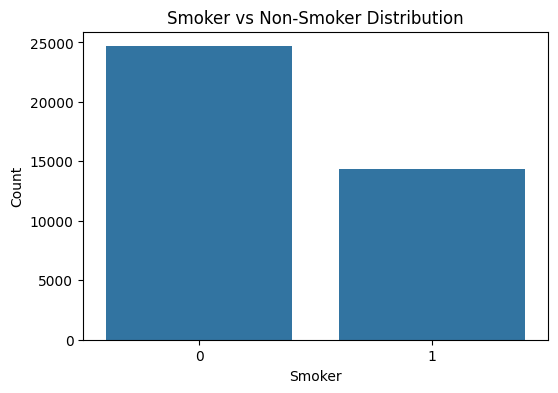

In [10]:


plt.figure(figsize=(6,4))
sns.countplot(data=df, x="smoking")
plt.title("Smoker vs Non-Smoker Distribution")
plt.xlabel("Smoker")
plt.ylabel("Count")

plt.show()


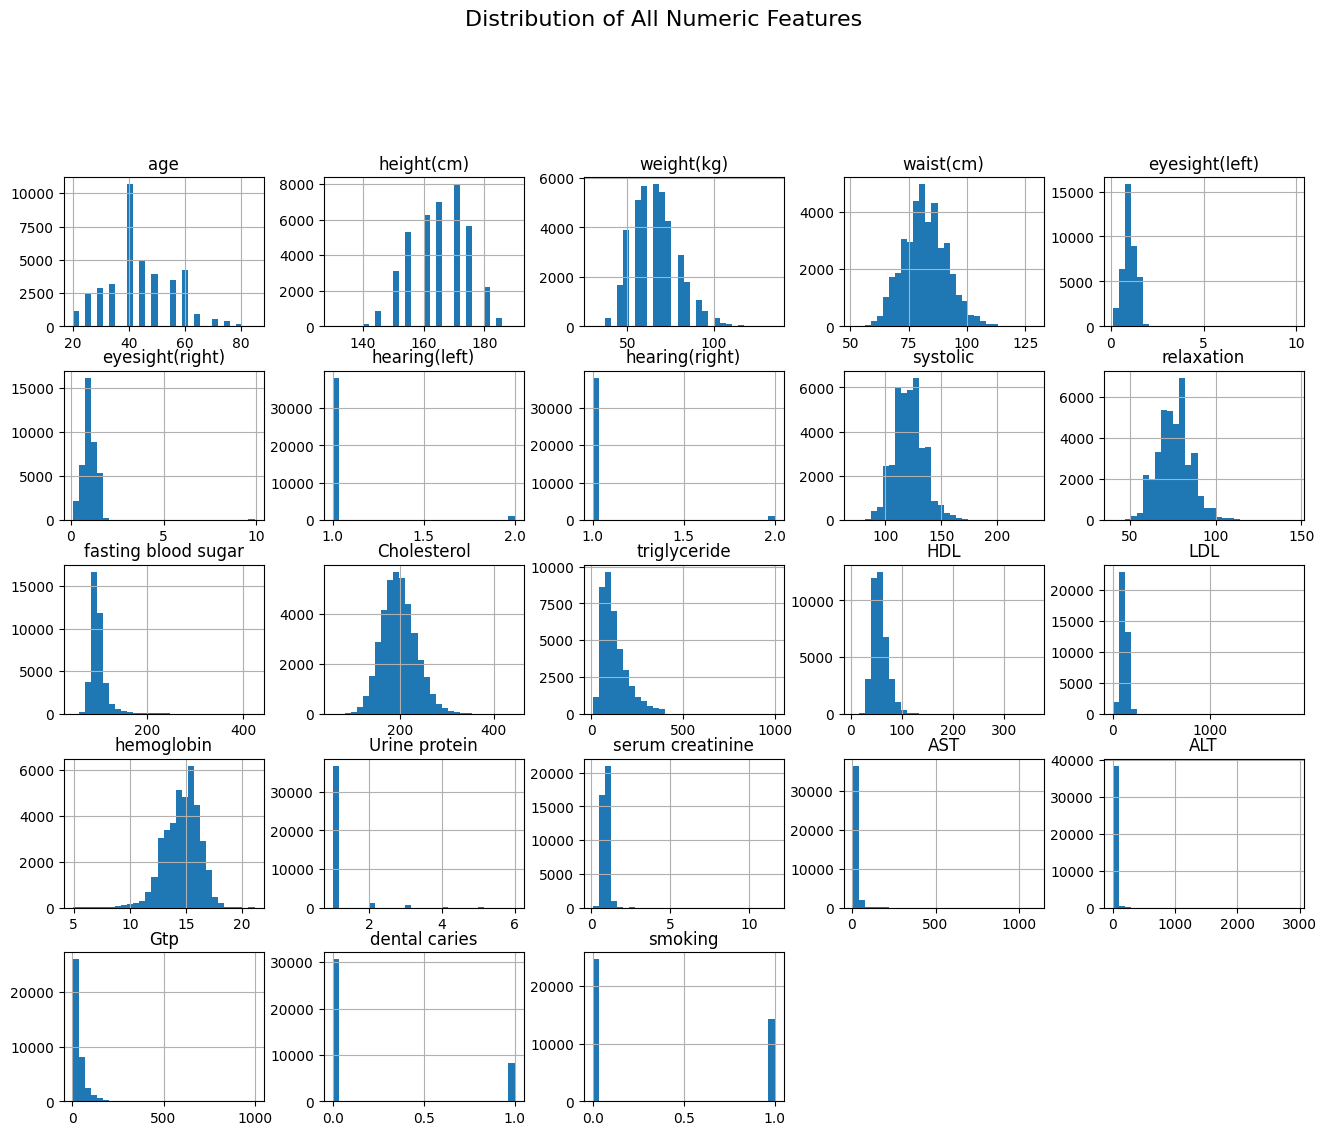

In [ ]:
# Histograms for numeric features

df[num_cols].hist(figsize=(16, 12), bins=30)
plt.suptitle("Distribution of All Numeric Features", y=1.02, fontsize=16)
plt.show()


## Histogram Insights

**Key Insights**
- Age is concentrated around 40–60, indicating a mostly middle-aged population with limited age-based separation.
- Height, weight, and waist follow near-normal distributions, showing stable and consistent body metrics.
- Eyesight and hearing values are highly concentrated at 1.0 and 1, behaving almost like categorical features with very low variance.
- Blood pressure variables show mild right skew, with a small hypertensive tail.
- Lipid and liver markers (triglyceride, AST, ALT, GTP) are extremely right-skewed, with long tails indicating medical outliers.
- Kidney markers (serum creatinine, urine protein) show spikes at low values with rare but large outliers.

**Conclusion:**  
Most physical measurements are normally distributed, while metabolic and liver/kidney markers show strong skew and outliers. These features will heavily influence PCA and clustering unless scaled.


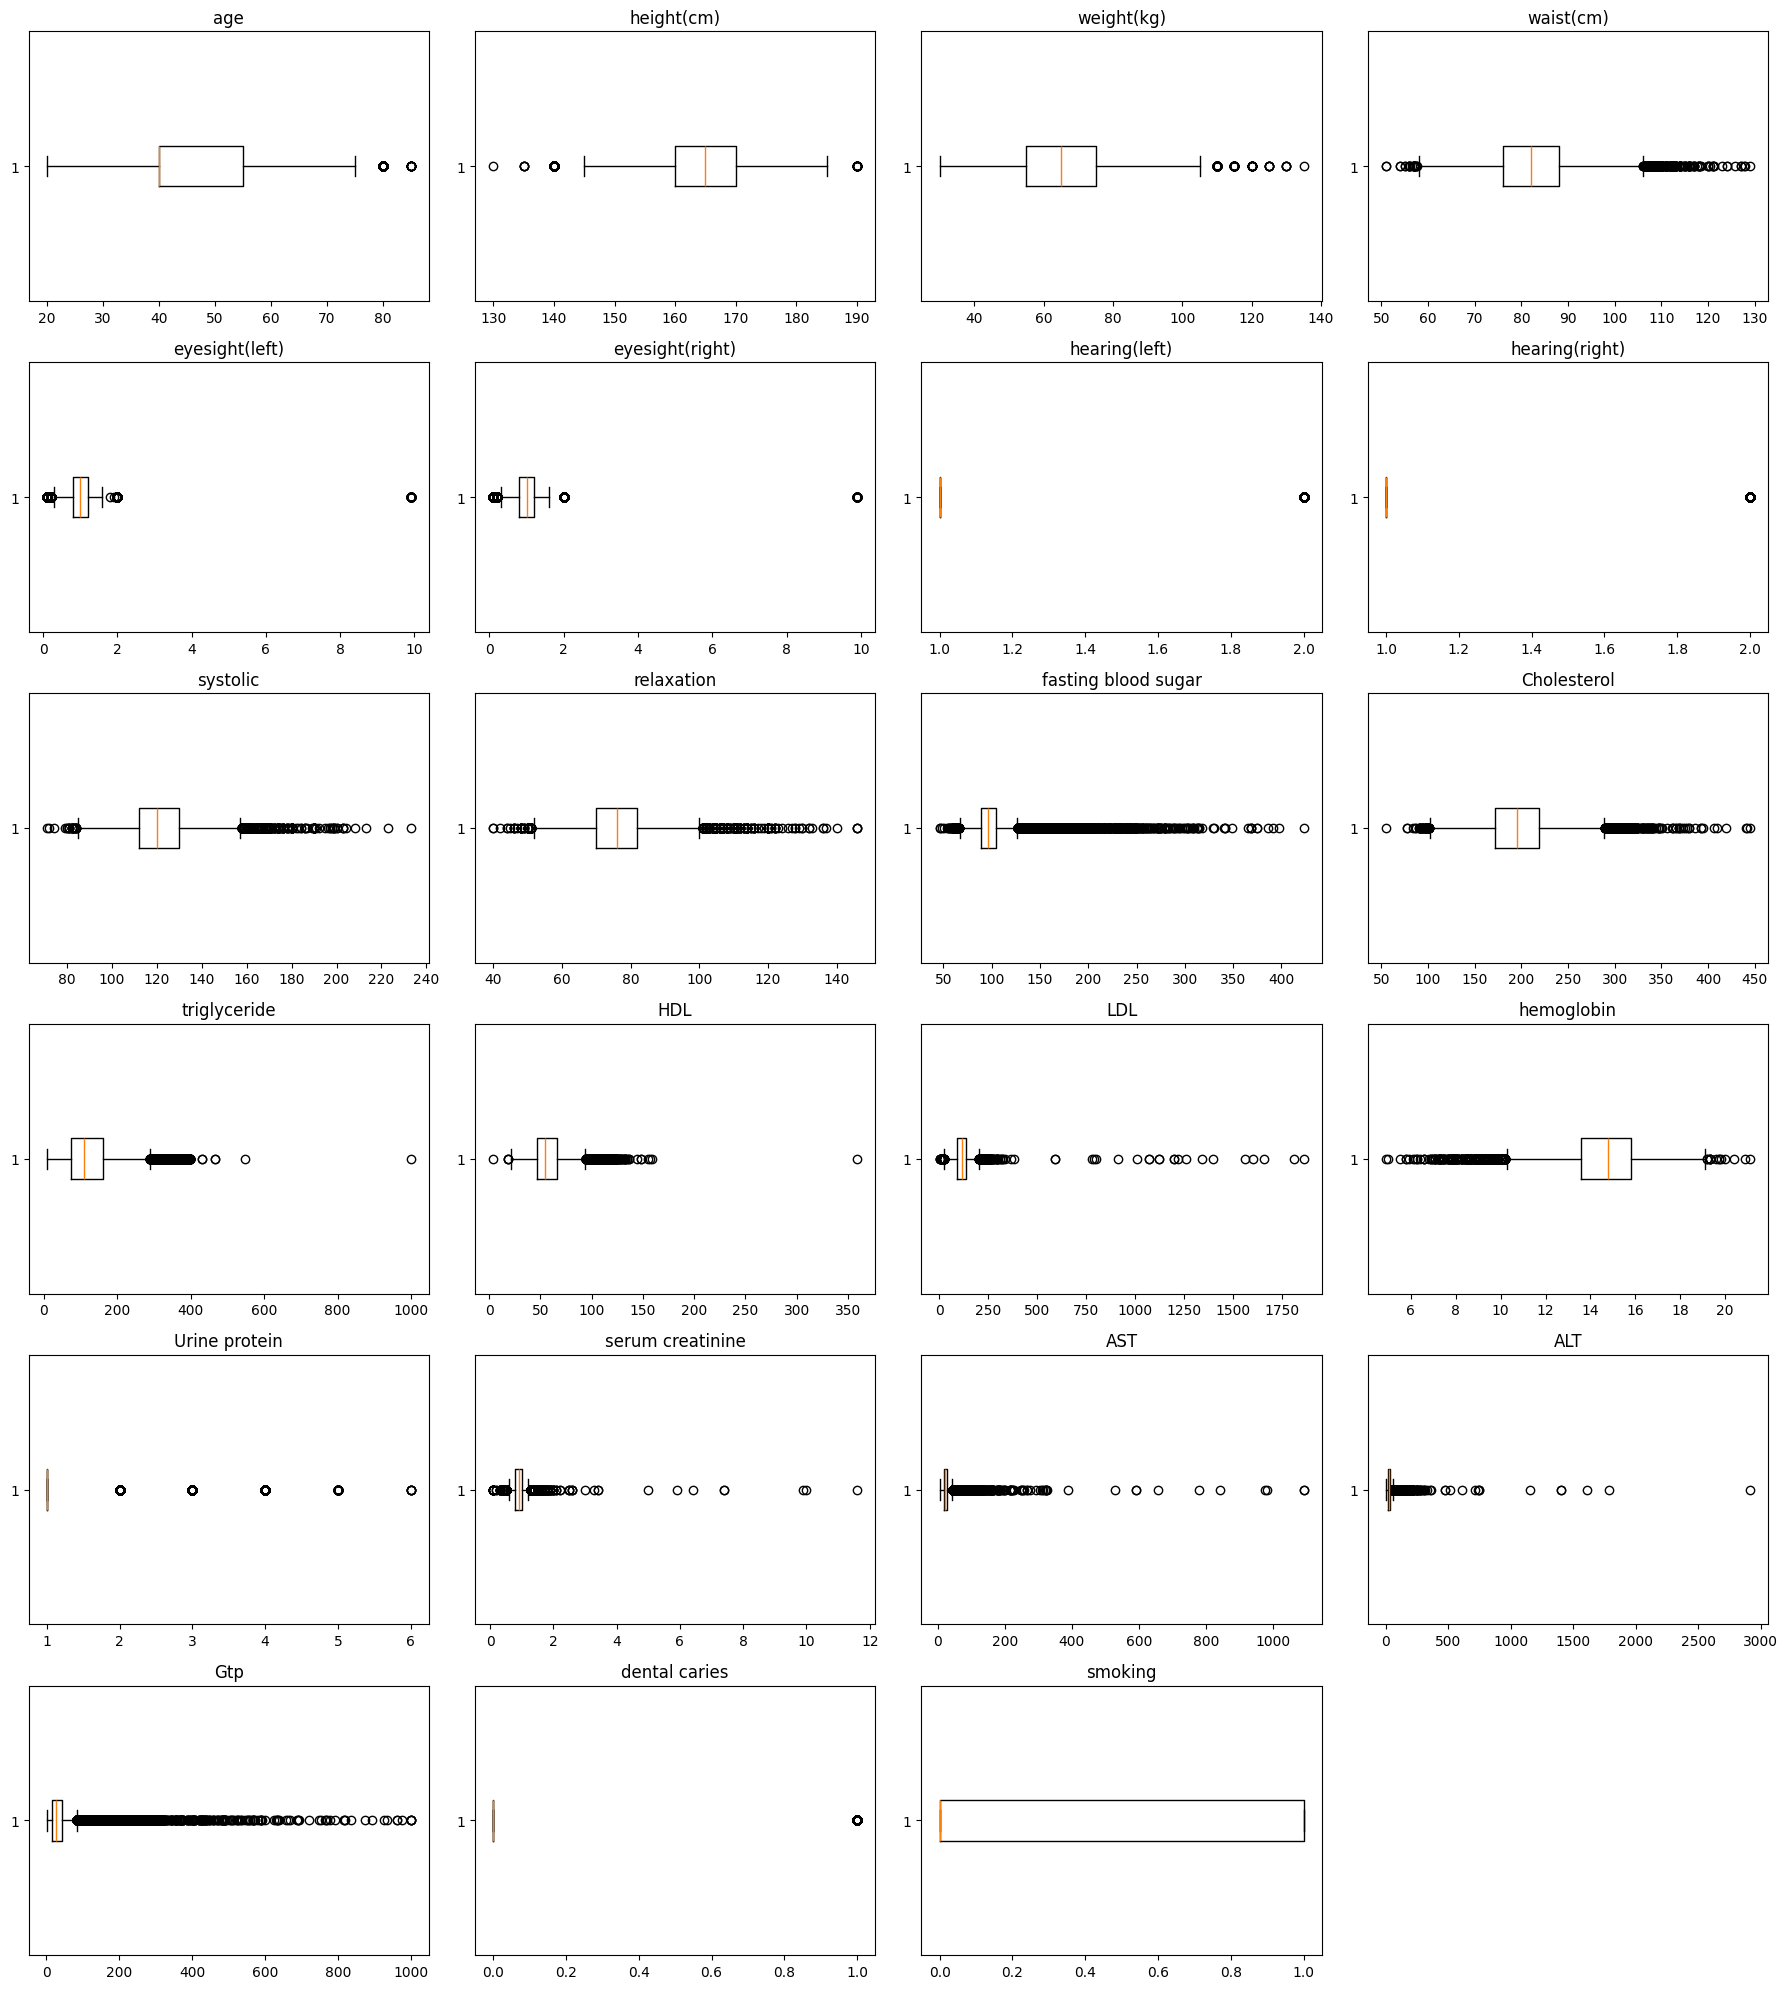

In [ ]:
#Boxplots for Outlier Detection

plt.figure(figsize=(18, 20))
for i, col in enumerate(num_cols):
    plt.subplot(6, 4, i+1)
    plt.boxplot(df[col], vert=False)
    plt.title(col)
plt.tight_layout()
plt.show()


## Outlier Analysis

**Key Insights**
- Body metrics (age, height, weight, waist) show very few outliers, indicating a stable adult population.
- Eyesight and hearing have extremely low variance with occasional spikes, acting almost like categorical variables.
- Blood pressure shows moderate right-side outliers, highlighting a hypertensive subgroup.
- Lipid features (Cholesterol, LDL) have mild outliers, while triglyceride shows extreme skew with very high values.
- Liver enzymes (AST, ALT, GTP) and kidney markers (serum creatinine, urine protein) contain the strongest outliers in the dataset.
- Smoking and dental caries behave like binary variables, offering little contribution to distance-based models.

**Conclusion:**  
Outliers are concentrated in liver and kidney markers and strongly impact variance. These features require scaling but should not be removed, as they represent meaningful medical risk groups.


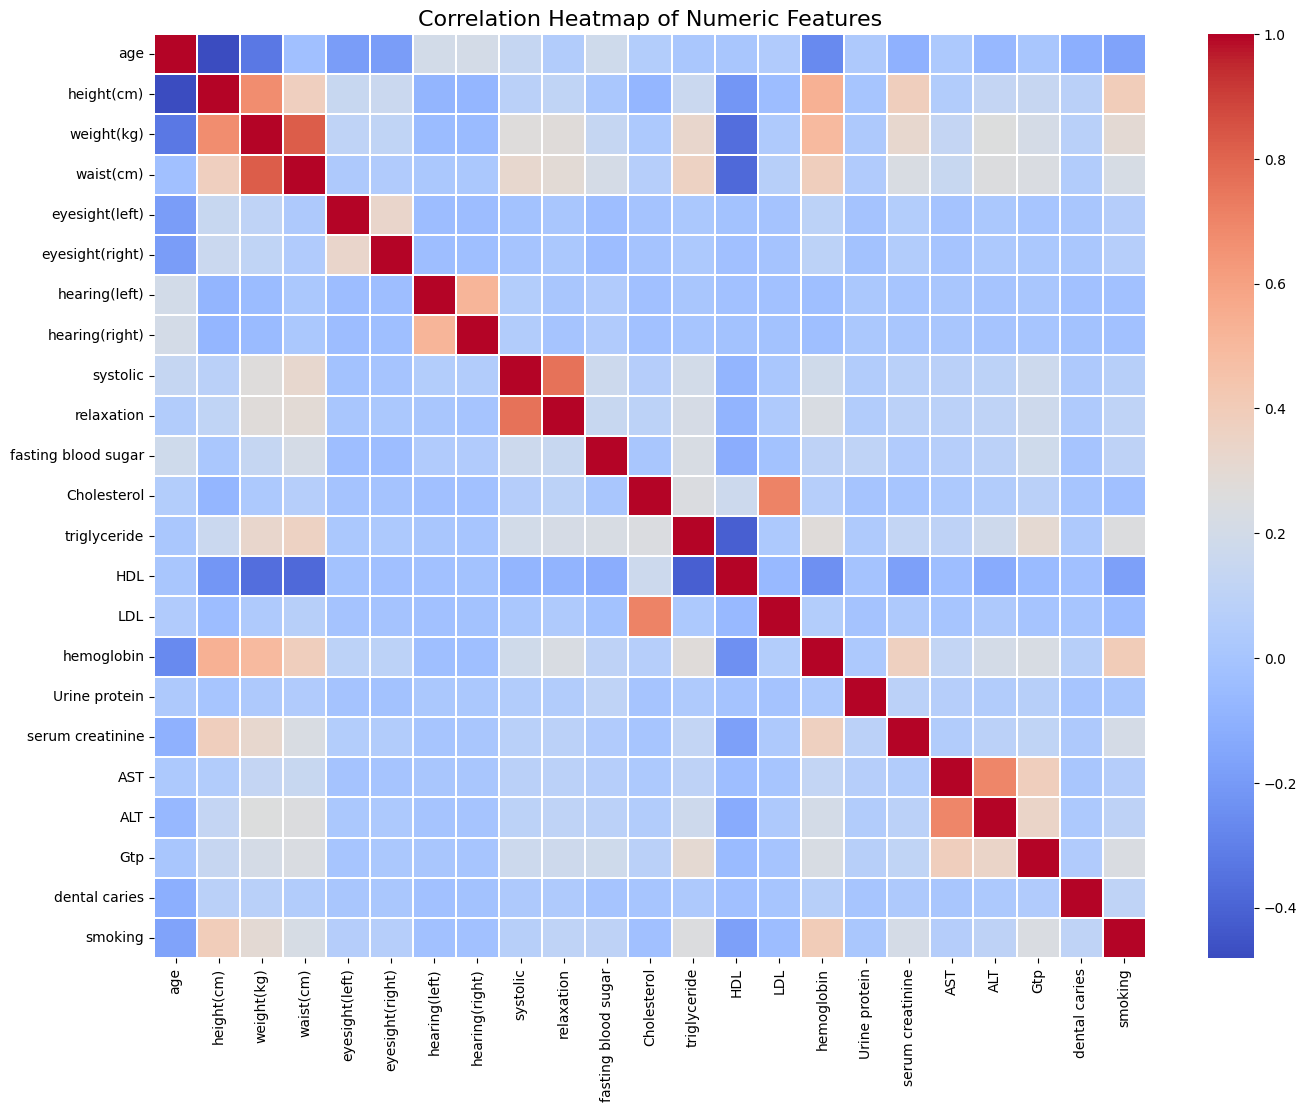

In [ ]:
#Correlation Matrix Heatmap

plt.figure(figsize=(16, 12))
corr = df[num_cols].corr()

sns.heatmap(
    corr,
    annot=False,
    cmap="coolwarm",
    linewidths=0.2
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()


In [ ]:
#Top Correlated Pairs

corr_pairs = corr.unstack().reset_index()
corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]

corr_pairs = corr_pairs[corr_pairs["Feature1"] != corr_pairs["Feature2"]]

top_corr = corr_pairs.reindex(corr_pairs.Correlation.abs().sort_values(ascending=False).index)


top_corr.head(15)


,Feature1,Feature2,Correlation
71,waist(cm),weight(kg),0.824865
49,weight(kg),waist(cm),0.824865
193,systolic,relaxation,0.759041
215,relaxation,systolic,0.759041
333,LDL,Cholesterol,0.707040
267,Cholesterol,LDL,0.707040
455,ALT,AST,0.697057
433,AST,ALT,0.697057
25,height(cm),weight(kg),0.673710
47,weight(kg),height(cm),0.673710


## Correlation Heatmap Insights

**Key Insights**
- Height, weight, and waist show strong mutual correlations, forming a clear body-size group.
- Systolic and diastolic BP correlate strongly, indicating a natural high-BP subgroup.
- Cholesterol and LDL have a strong positive relationship, confirming a lipid-health group.
- Liver enzymes (AST, ALT, GTP) correlate well and likely represent a distinct liver-risk cluster.
- Eyesight and hearing pairs show moderate correlation but very low variance, making them weak contributors to clustering.
- Smoking has near-zero correlation with most features, meaning it does not align with measured health markers.

**Conclusion:**  
The dataset naturally forms medical feature groups (body size, BP, lipids, liver enzymes). These correlations guide PCA and clustering by showing which variables move together and which features carry redundant information.


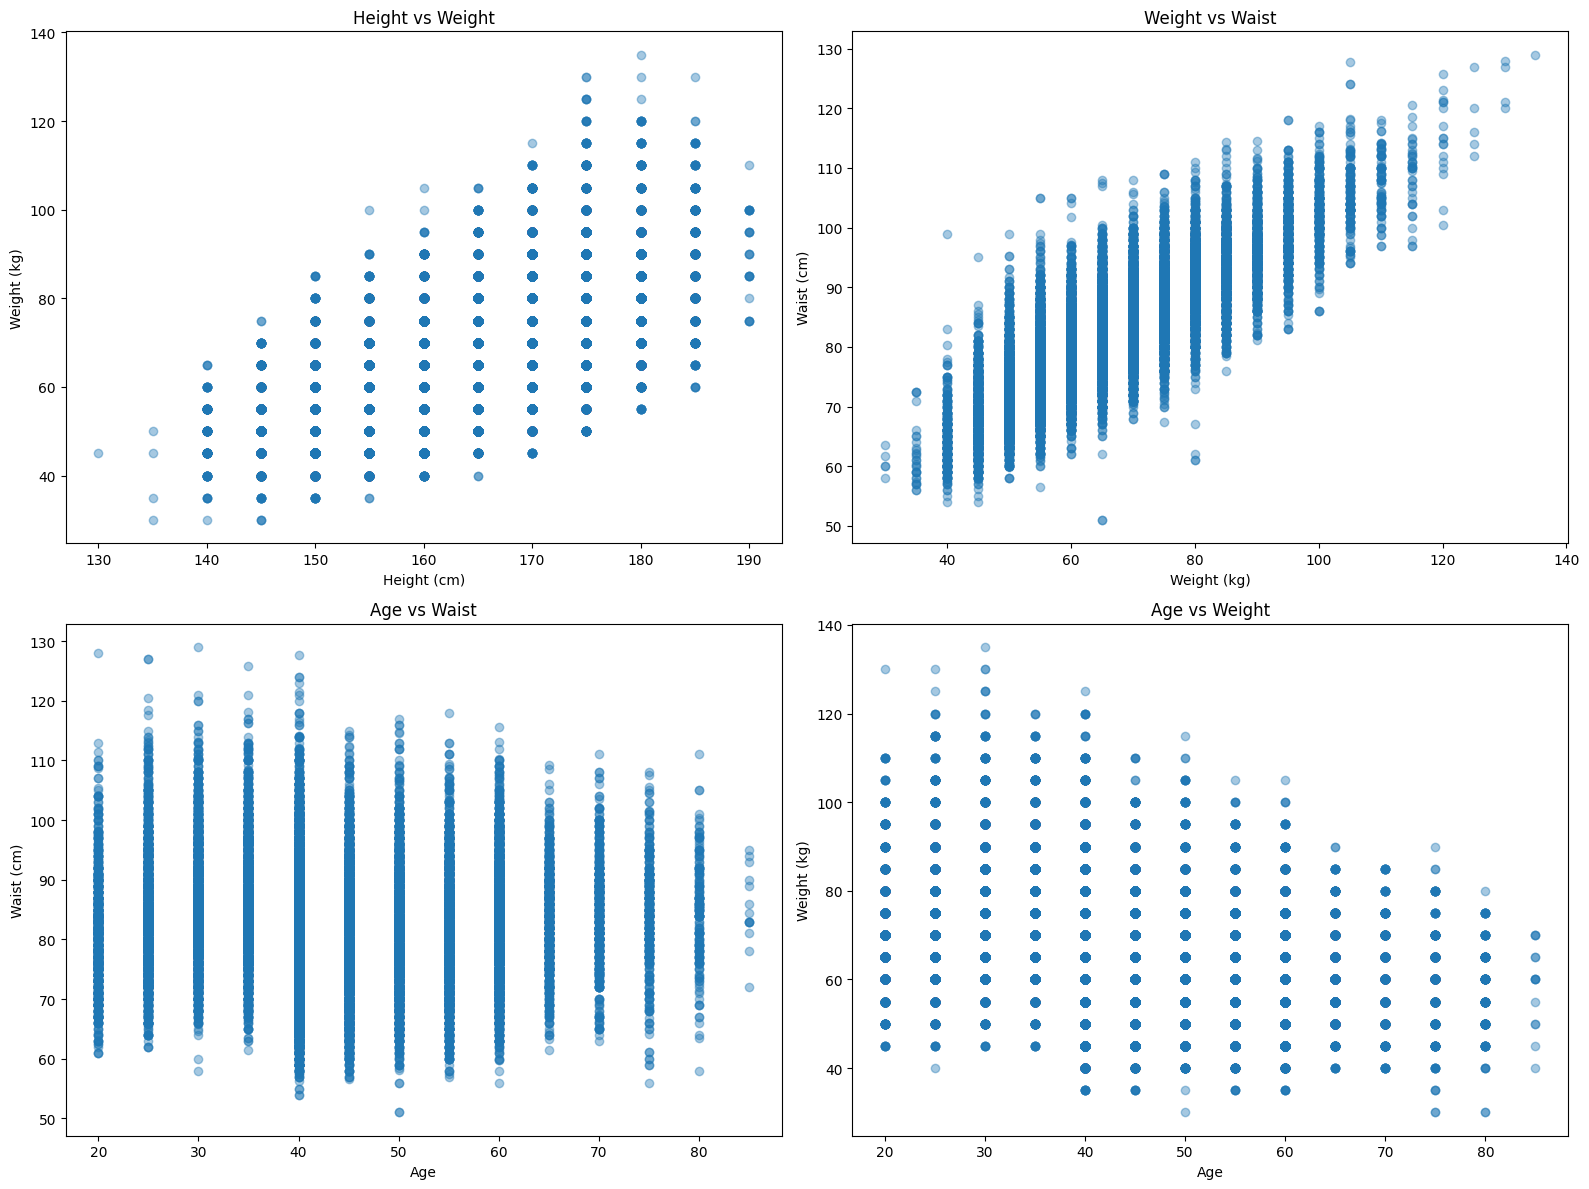

In [ ]:
# Body Metrics Deep Dive


plt.figure(figsize=(16, 12))

# Height vs Weight
plt.subplot(2, 2, 1)
plt.scatter(df['height(cm)'], df['weight(kg)'], alpha=0.4)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Height vs Weight")

# Weight vs Waist
plt.subplot(2, 2, 2)
plt.scatter(df['weight(kg)'], df['waist(cm)'], alpha=0.4)
plt.xlabel("Weight (kg)")
plt.ylabel("Waist (cm)")
plt.title("Weight vs Waist")

# Age vs Waist
plt.subplot(2, 2, 3)
plt.scatter(df['age'], df['waist(cm)'], alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Waist (cm)")
plt.title("Age vs Waist")

# Age vs Weight
plt.subplot(2, 2, 4)
plt.scatter(df['age'], df['weight(kg)'], alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Weight (kg)")
plt.title("Age vs Weight")

plt.tight_layout()
plt.show()


### Body Metrics EDA (Height, Weight, Waist, Age)

**Key Insights**
- Height and weight show a strong linear relationship, forming a clean diagonal trend.
- Waist circumference rises steadily with weight, making it a strong indicator of body fat.
- Waist is highest in mid-age (35–55), with younger and older individuals showing lower values.
- Weight also peaks around ages 30–50 and declines after ~55, matching typical metabolic patterns.
- These variables naturally group individuals into lean, mid-age heavier, and older lighter categories.

**Conclusion:**  
Body metrics form a coherent physical-size group with clear trends across age. These features can produce meaningful health-related clusters and justify deriving BMI for more stable interpretation.


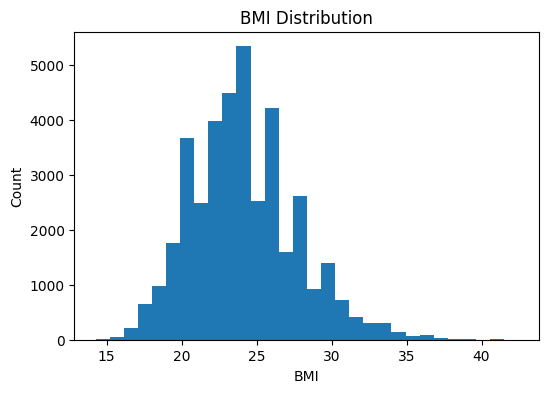

In [ ]:
df['BMI'] = df['weight(kg)'] / (df['height(cm)'] / 100)**2

plt.figure(figsize=(6,4))
plt.hist(df['BMI'], bins=30)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()


## BMI EDA

**Key Insights**
- BMI is centered around 23–26, slightly above the healthy range, indicating a borderline-overweight population.
- The distribution is mildly right-skewed, with few individuals reaching BMI > 35.
- Extremely low (<18.5) or very high (>40) BMI values are rare.
- Most individuals fall between BMI 20–30, forming a large middle group.
- BMI reflects physical clustering better than weight or height alone, reducing redundancy among body metrics.

**Conclusion:**  
BMI cleanly separates individuals into lean, average, and overweight groups. It is a more informative and stable feature for clustering and modeling than raw height or weight.


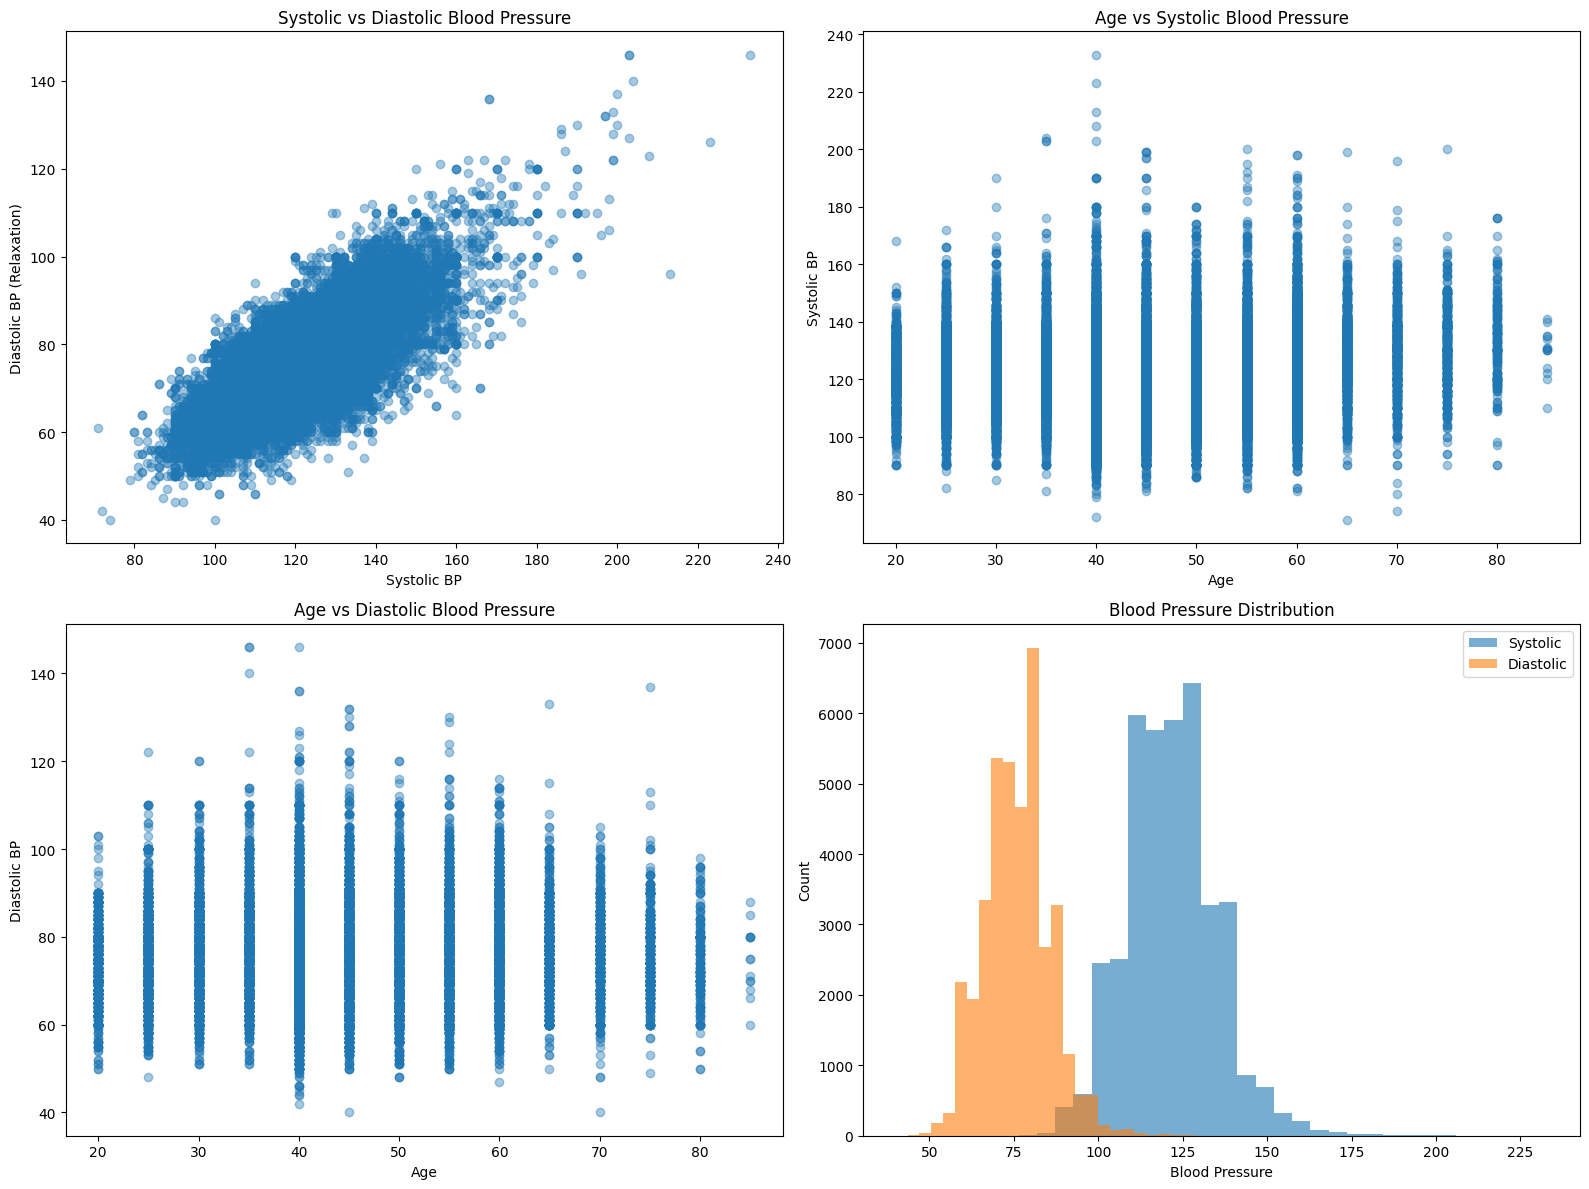

In [ ]:
# Blood Pressure Deep Dive


plt.figure(figsize=(16, 12))

# 1. Systolic vs Diastolic
plt.subplot(2, 2, 1)
plt.scatter(df['systolic'], df['relaxation'], alpha=0.4)
plt.xlabel("Systolic BP")
plt.ylabel("Diastolic BP (Relaxation)")
plt.title("Systolic vs Diastolic Blood Pressure")

# 2. Age vs Systolic
plt.subplot(2, 2, 2)
plt.scatter(df['age'], df['systolic'], alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Systolic BP")
plt.title("Age vs Systolic Blood Pressure")

# 3. Age vs Diastolic
plt.subplot(2, 2, 3)
plt.scatter(df['age'], df['relaxation'], alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Diastolic BP")
plt.title("Age vs Diastolic Blood Pressure")

# 4. Distribution of Systolic & Diastolic
plt.subplot(2, 2, 4)
plt.hist(df['systolic'], bins=30, alpha=0.6, label='Systolic')
plt.hist(df['relaxation'], bins=30, alpha=0.6, label='Diastolic')
plt.xlabel("Blood Pressure")
plt.ylabel("Count")
plt.title("Blood Pressure Distribution")
plt.legend()

plt.tight_layout()
plt.show()


## Blood Pressure EDA (Systolic & Diastolic)

**Key Insights**
- Systolic and diastolic BP have a strong linear relationship, forming a dense diagonal pattern.
- Most systolic values fall between 100–160, while diastolic values fall between 60–100.
- A small hypertensive subgroup exists with systolic >180 and diastolic >110.
- Systolic shows larger spread with age, especially between 40–60 years.
- Diastolic peaks around ages 30–50 and slightly declines after 55.
- Systolic distribution has a heavy right tail, indicating more high-risk individuals.

**Modeling Notes**
- Systolic will contribute more to variance-based models (PCA, clustering) than diastolic.
- BP naturally forms at least two clusters: normal BP and high BP.

**Conclusion:**  
Blood pressure data shows clear age-related trends, strong systolic–diastolic correlation, and a visible hypertensive subgroup. These variables are important drivers for health-risk clustering.


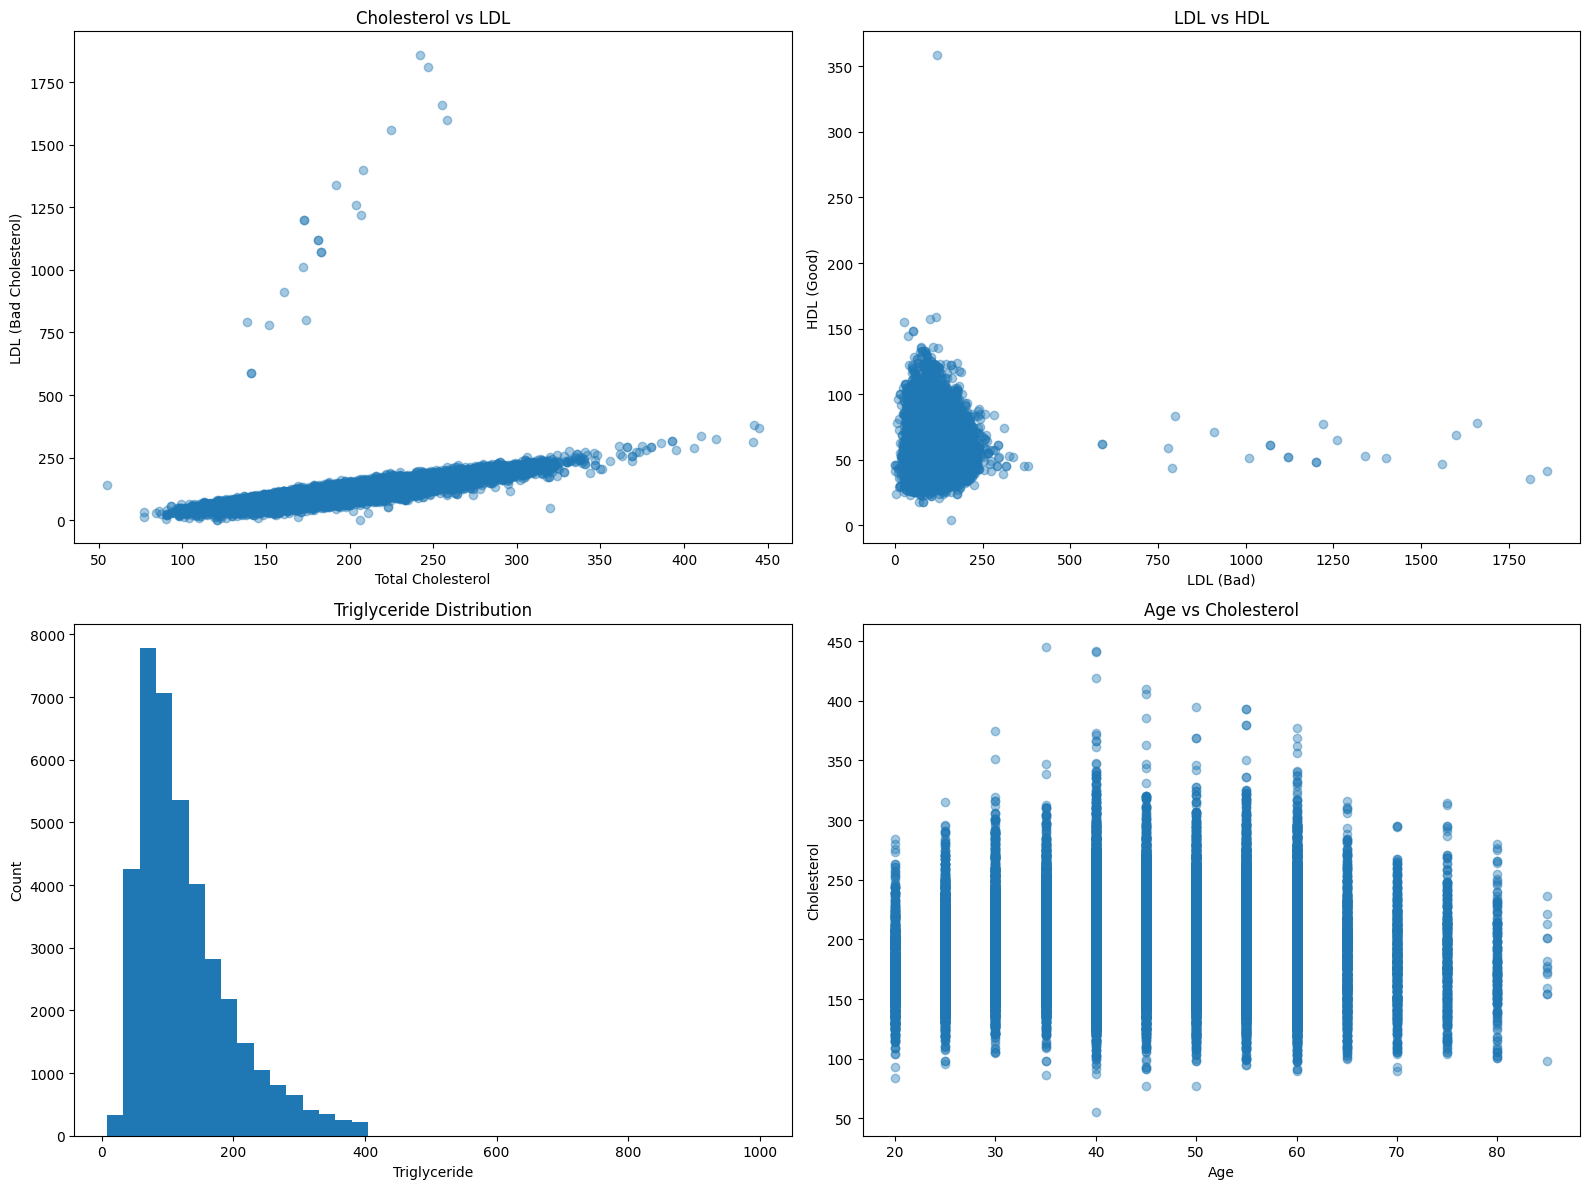

In [ ]:
# Lipid Profile Deep Dive


plt.figure(figsize=(16, 12))

# 1. Cholesterol vs LDL
plt.subplot(2, 2, 1)
plt.scatter(df['Cholesterol'], df['LDL'], alpha=0.4)
plt.xlabel("Total Cholesterol")
plt.ylabel("LDL (Bad Cholesterol)")
plt.title("Cholesterol vs LDL")

# 2. LDL vs HDL
plt.subplot(2, 2, 2)
plt.scatter(df['LDL'], df['HDL'], alpha=0.4)
plt.xlabel("LDL (Bad)")
plt.ylabel("HDL (Good)")
plt.title("LDL vs HDL")

# 3. Triglyceride Distribution (extreme skew)
plt.subplot(2, 2, 3)
plt.hist(df['triglyceride'], bins=40)
plt.xlabel("Triglyceride")
plt.ylabel("Count")
plt.title("Triglyceride Distribution")

# 4. Age vs Cholesterol
plt.subplot(2, 2, 4)
plt.scatter(df['age'], df['Cholesterol'], alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("Age vs Cholesterol")

plt.tight_layout()
plt.show()


## Lipid Profile EDA (Cholesterol, LDL, HDL, Triglyceride)

**Key Insights**
- Cholesterol and LDL show a strong positive relationship, with a few extreme outliers (LDL > 1000).
- HDL behaves independently from LDL/Cholesterol and does not follow the same trend.
- Triglyceride is extremely right-skewed, with a long tail reaching ~1000.
- Most triglyceride values lie below 200 but outliers heavily distort variance.
- Age shows a mild increasing trend with cholesterol until midlife, then stabilizes.

**Modeling Notes**
- StandardScaler is essential because triglyceride and LDL have large variance.
- Lipid variables will likely form their own risk-based clusters.

**Conclusion:**  
The lipid profile group contains strong correlations (Cholesterol–LDL) and extreme skew (triglyceride). These features highlight metabolic risk variation and will significantly influence clustering and PCA.


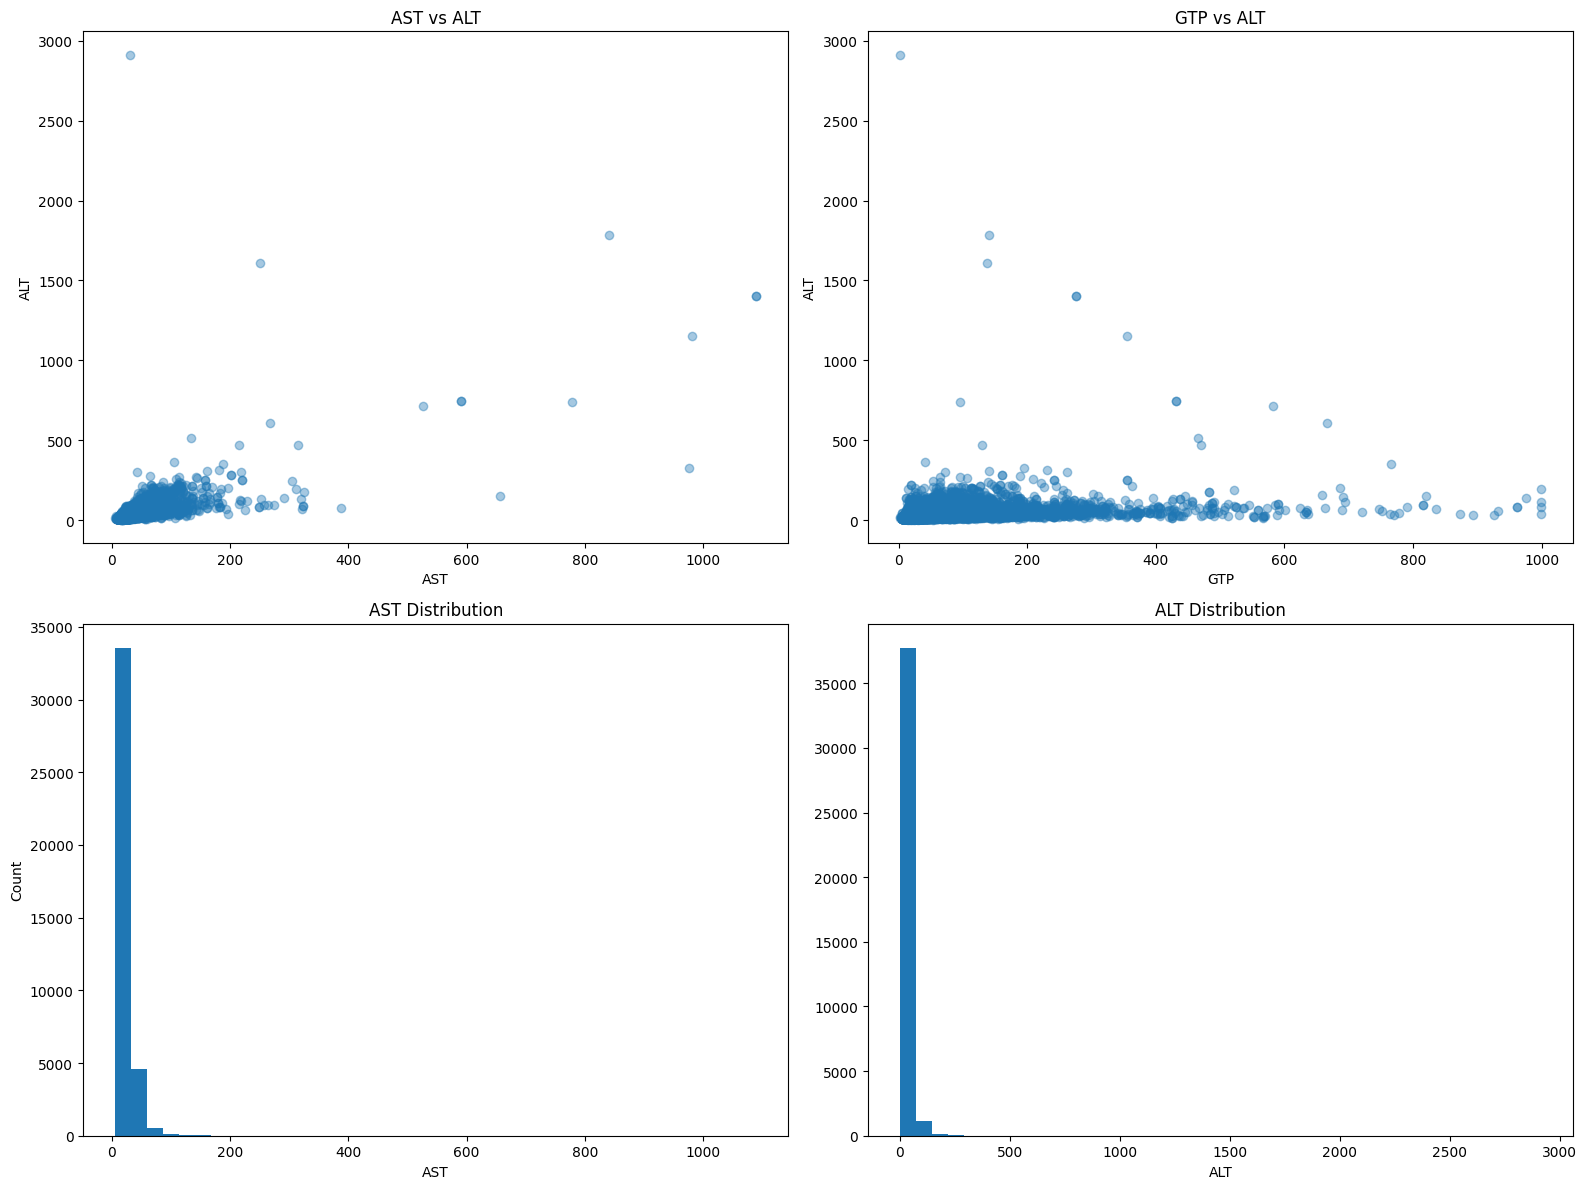

In [ ]:
# Liver Function Deep Dive (AST, ALT, GTP)


plt.figure(figsize=(16, 12))

# 1. AST vs ALT
plt.subplot(2, 2, 1)
plt.scatter(df['AST'], df['ALT'], alpha=0.4)
plt.xlabel("AST")
plt.ylabel("ALT")
plt.title("AST vs ALT")

# 2. GTP vs ALT
plt.subplot(2, 2, 2)
plt.scatter(df['Gtp'], df['ALT'], alpha=0.4)
plt.xlabel("GTP")
plt.ylabel("ALT")
plt.title("GTP vs ALT")

# 3. AST Distribution
plt.subplot(2, 2, 3)
plt.hist(df['AST'], bins=40)
plt.xlabel("AST")
plt.ylabel("Count")
plt.title("AST Distribution")

# 4. ALT Distribution
plt.subplot(2, 2, 4)
plt.hist(df['ALT'], bins=40)
plt.xlabel("ALT")
ylabel = ("Count")
plt.title("ALT Distribution")

plt.tight_layout()
plt.show()


## Liver Function EDA (AST, ALT, GTP)

**Key Insights**
- ALT and AST have a positive relationship in the normal range but break down due to extreme outliers.
- Most values for AST and ALT lie below ~60, indicating generally healthy liver profiles.
- A very small number of samples show extreme values (ALT > 2000, AST > 1000).
- GTP follows the same pattern: dense low-end cluster with heavy right-skew.
- All liver enzymes show strong right-skewness dominated by a few high-risk individuals.
- These variables will strongly influence clustering/PCA unless scaled.

**Conclusion:**  
Liver markers exhibit extreme skew and outliers, forming a distinct high-risk subgroup. They require scaling and will likely dominate variance-based models.


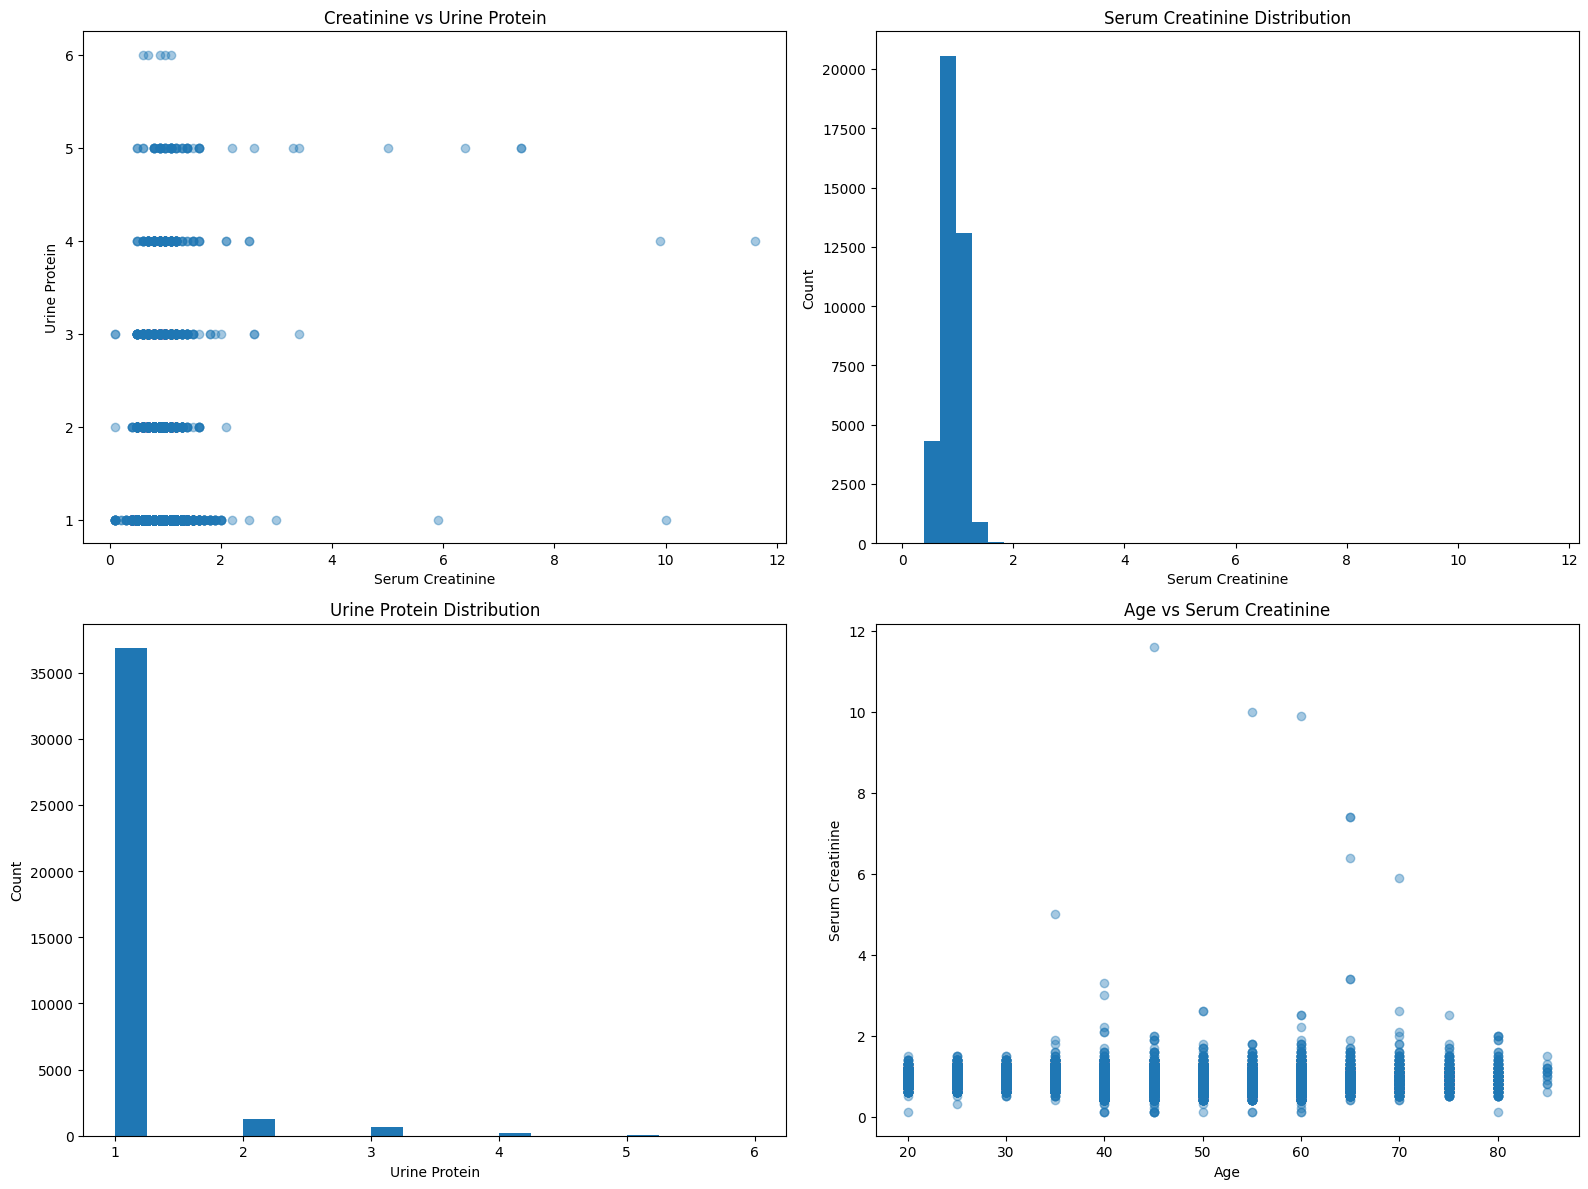

In [ ]:
# Kidney Function Deep Dive


plt.figure(figsize=(16, 12))

# 1. Serum Creatinine vs Urine Protein
plt.subplot(2, 2, 1)
plt.scatter(df['serum creatinine'], df['Urine protein'], alpha=0.4)
plt.xlabel("Serum Creatinine")
plt.ylabel("Urine Protein")
plt.title("Creatinine vs Urine Protein")

# 2. Serum Creatinine Distribution
plt.subplot(2, 2, 2)
plt.hist(df['serum creatinine'], bins=40)
plt.xlabel("Serum Creatinine")
plt.ylabel("Count")
plt.title("Serum Creatinine Distribution")

# 3. Urine Protein Distribution
plt.subplot(2, 2, 3)
plt.hist(df['Urine protein'], bins=20)
plt.xlabel("Urine Protein")
plt.ylabel("Count")
plt.title("Urine Protein Distribution")

# 4. Age vs Serum Creatinine
plt.subplot(2, 2, 4)
plt.scatter(df['age'], df['serum creatinine'], alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Serum Creatinine")
plt.title("Age vs Serum Creatinine")

plt.tight_layout()
plt.show()


## Kidney Function EDA (Serum Creatinine & Urine Protein)

**Key Insights**
- Serum creatinine is heavily right-skewed: most values lie below 1.2, but a few extreme outliers reach 10–12.
- Urine protein behaves like an ordinal categorical feature: most values are exactly 1, with occasional higher levels (2–6).
- Higher creatinine values often coincide with elevated urine protein, indicating potential kidney impairment.
- Age vs creatinine shows mostly normal values across all ages, but outliers appear between ages 40–60.
- These features represent rare but medically significant abnormalities, not noise.
- The extreme numeric range means creatinine will strongly influence clustering unless scaled.

**Conclusion:**  
Kidney markers contain rare yet important high-risk cases. Their strong skew and extreme outliers make scaling essential, and they may form a distinct “kidney-risk” cluster during unsupervised learning.


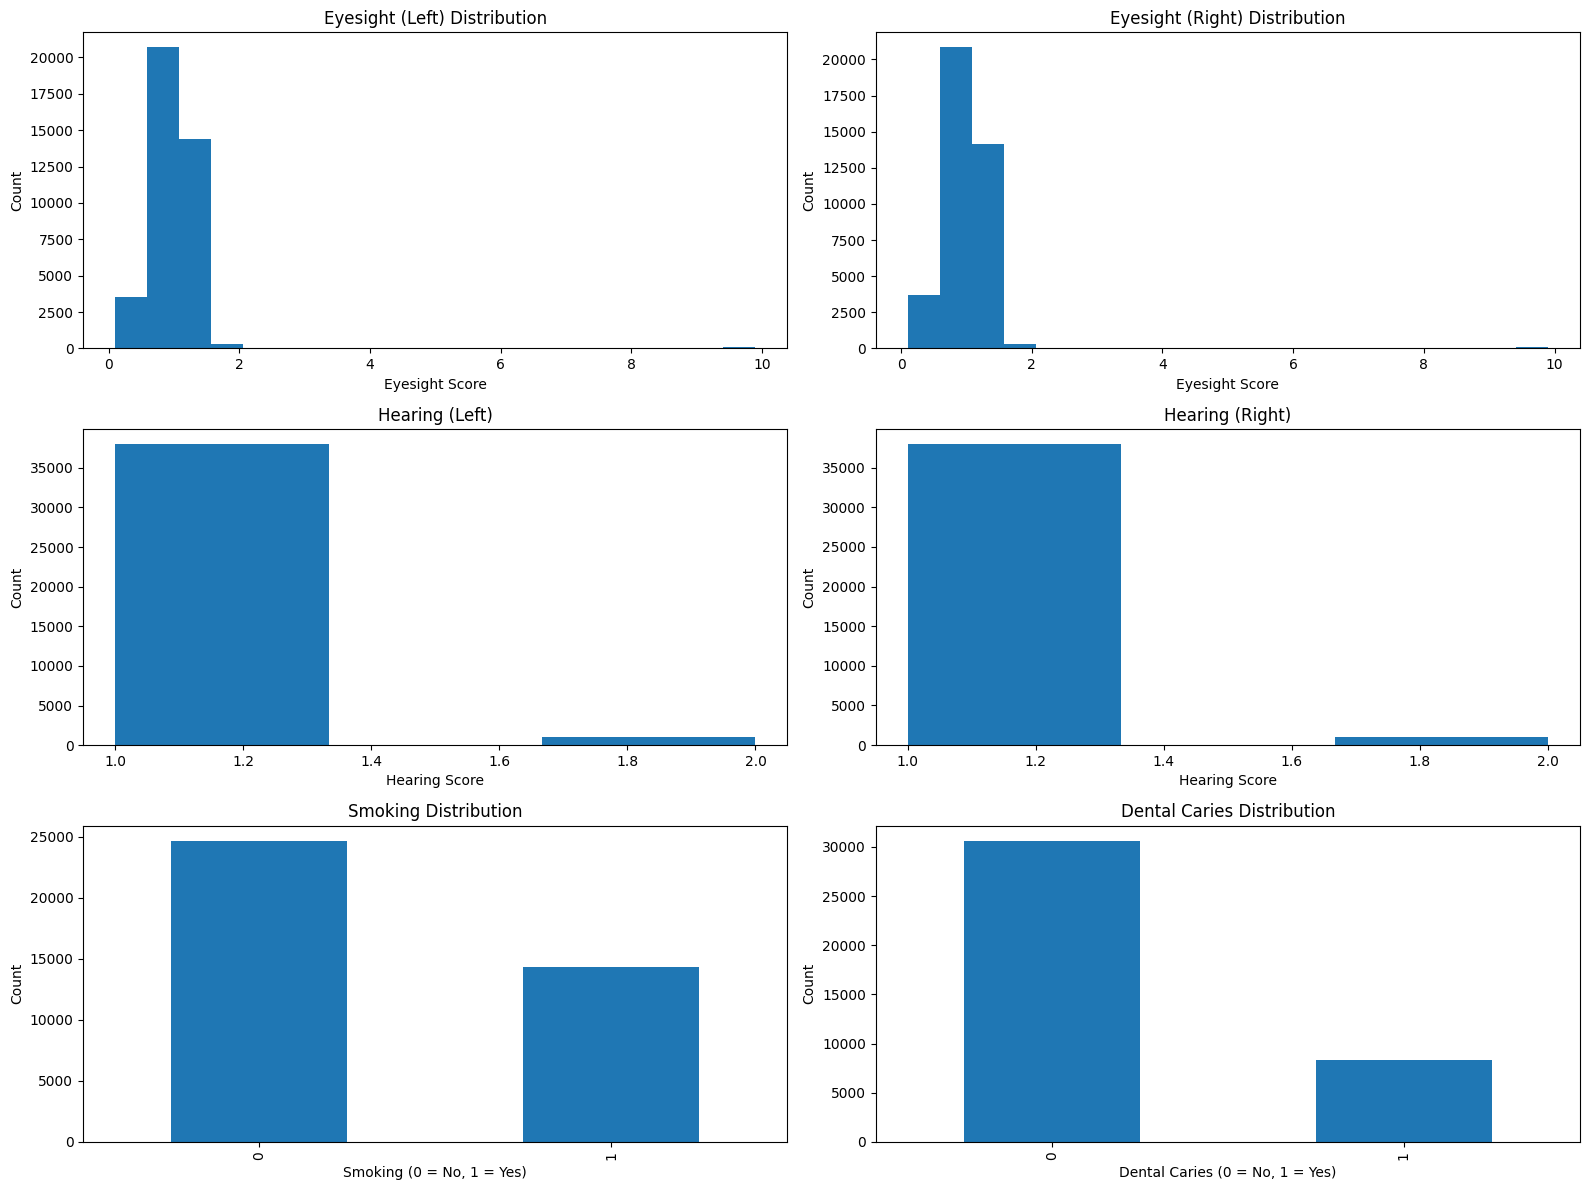

In [ ]:
# Low-Variance Sensory & Lifestyle Features


plt.figure(figsize=(16, 12))

# 1. Eyesight distributions
plt.subplot(3, 2, 1)
plt.hist(df['eyesight(left)'], bins=20)
plt.title("Eyesight (Left) Distribution")
plt.xlabel("Eyesight Score")
plt.ylabel("Count")

plt.subplot(3, 2, 2)
plt.hist(df['eyesight(right)'], bins=20)
plt.title("Eyesight (Right) Distribution")
plt.xlabel("Eyesight Score")
plt.ylabel("Count")

# 2. Hearing distributions
plt.subplot(3, 2, 3)
plt.hist(df['hearing(left)'], bins=3)
plt.title("Hearing (Left)")
plt.xlabel("Hearing Score")
plt.ylabel("Count")

plt.subplot(3, 2, 4)
plt.hist(df['hearing(right)'], bins=3)
plt.title("Hearing (Right)")
plt.xlabel("Hearing Score")
plt.ylabel("Count")

# 3. Lifestyle: Smoking & Dental Caries
plt.subplot(3, 2, 5)
df['smoking'].value_counts().sort_index().plot(kind='bar')
plt.title("Smoking Distribution")
plt.xlabel("Smoking (0 = No, 1 = Yes)")
plt.ylabel("Count")

plt.subplot(3, 2, 6)
df['dental caries'].value_counts().sort_index().plot(kind='bar')
plt.title("Dental Caries Distribution")
plt.xlabel("Dental Caries (0 = No, 1 = Yes)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


### Eyesight, Hearing, Smoking & Dental Caries

**Key Insights**
- Eyesight (left/right) is heavily right-skewed, with most values near 1.0 and very few extreme high values.
- Hearing scores behave almost like binary variables: nearly everyone has a score of 1, with very few 2s.
- Smoking is moderately imbalanced (more non-smokers than smokers), but still provides useful class variation.
- Dental caries is highly imbalanced, with the majority having no caries (0).
- Eyesight and hearing have extremely low variance, so they contribute little to distance-based clustering.
- Smoking and dental caries act like categorical health indicators rather than continuous features.

**Conclusion:**  
These sensory and lifestyle features show low variance and strong class imbalance. They are informative for classification tasks but have limited influence in clustering compared to metabolic and physical metrics.


In [ ]:
df.isnull().sum()

,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0
relaxation,0


## **Preprocessing**

In [ ]:
print("df shape:", df.shape)
display(df.head())

df shape: (38984, 24)


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,142,19.8,1,1.0,61,115,125,1,1,29.411765
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,114,15.9,1,1.1,19,25,30,1,0,35.918367
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,112,13.7,3,0.6,1090,1400,276,0,0,27.055151
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,91,16.9,1,0.9,32,36,36,0,0,29.384757
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,92,14.9,1,1.2,26,28,15,0,0,22.038567


In [ ]:
# features/target separation
X = df.drop('smoking', axis=1).copy()
y = df['smoking'].copy()

print("X shape:", X.shape)
print("y distribution:\n", y.value_counts())


X shape: (38984, 23)
y distribution:
 smoking
0    24666
1    14318
Name: count, dtype: int64


In [ ]:
# split (80/20) stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())


X_train: (31187, 23) X_test: (7797, 23)
y_train distribution:
 smoking
0    19733
1    11454
Name: count, dtype: int64
y_test distribution:
 smoking
0    4933
1    2864
Name: count, dtype: int64


In [ ]:
# scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# convert back to DataFrame (keep column names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X.columns, index=X_test.index)

display(X_train_scaled.head())
print("Scaled train mean (approx):\n", X_train_scaled.mean().round(3)[:5])
print("Scaled train std  (approx):\n", X_train_scaled.std().round(3)[:5])


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,BMI
23108,-0.341439,0.577175,0.699967,0.742462,0.980448,0.401189,-0.160373,-0.162464,-0.914187,-0.310839,...,-0.294978,0.992898,0.303304,-0.216344,0.968743,-0.364450,-0.006553,-0.397940,1.914112,0.502959
6420,0.901668,-1.597897,-0.848992,-1.401277,-0.229589,-0.635025,-0.160373,-0.162464,-1.500172,-0.103389,...,-1.321493,1.083706,-0.333564,-0.216344,0.063699,-0.213504,-0.369831,-0.298294,-0.522435,0.073258
24851,0.901668,-2.141664,-0.461752,0.849649,-0.229589,-0.013297,-0.160373,-0.162464,-0.840938,-0.622013,...,-0.089675,-0.210312,-0.970432,-0.216344,-0.841345,-0.163188,-0.218465,-0.437798,-0.522435,1.240238
13772,0.901668,-1.054129,-0.461752,-0.115033,0.980448,-0.013297,-0.160373,-0.162464,-1.573420,-1.762987,...,-0.910887,-0.255716,-0.397251,9.680434,3.231352,-0.213504,-0.036826,-0.118931,-0.522435,0.224239
15059,-0.341439,1.120942,2.248926,2.135893,0.980448,-0.013297,-0.160373,-0.162464,1.503002,1.452484,...,-0.979322,0.357240,-0.142503,-0.216344,-0.388823,-0.465081,-0.036826,-0.198648,-0.522435,1.948165


Scaled train mean (approx):
 age               0.0
height(cm)        0.0
weight(kg)        0.0
waist(cm)         0.0
eyesight(left)    0.0
dtype: float64
Scaled train std  (approx):
 age               1.0
height(cm)        1.0
weight(kg)        1.0
waist(cm)         1.0
eyesight(left)    1.0
dtype: float64


In [ ]:
# PCA fit on training
pca_full = PCA(n_components=X_train_scaled.shape[1], random_state=42)
X_train_pca = pca_full.fit_transform(X_train_scaled)
X_test_pca  = pca_full.transform(X_test_scaled)

# put into DataFrame for readability
pca_cols = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_cols, index=X_train.index)
X_test_pca_df  = pd.DataFrame(X_test_pca,  columns=pca_cols, index=X_test.index)

display(X_train_pca_df.iloc[:, :5].head())   # show first 5 PCs


,PC1,PC2,PC3,PC4,PC5
23108,1.325821,-1.123363,1.853338,-0.133314,1.332818
6420,-2.161860,0.466134,0.947307,0.059455,0.793493
24851,-1.342077,0.814209,-0.236302,-0.400110,0.062838
13772,0.449839,1.114532,-1.624218,0.470729,1.367658
15059,3.530020,0.017969,0.432615,-1.874921,-0.713945


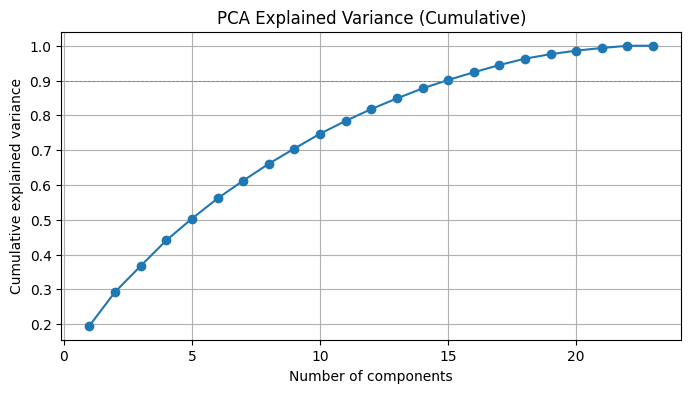

Explained variance (first 10): [0.1955 0.097  0.0748 0.0734 0.0624 0.058  0.0511 0.0486 0.0436 0.0425]
Cumulative (first 10): [0.1955 0.2925 0.3674 0.4408 0.5032 0.5612 0.6123 0.6609 0.7045 0.747 ]


In [ ]:
# explained variance (plot + print)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

plt.figure(figsize=(8,4))
plt.plot(range(1, len(explained)+1), cum_explained, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA Explained Variance (Cumulative)')
plt.grid(True)
plt.axhline(0.9, color='gray', linestyle='--', linewidth=0.6)  # 90% line
plt.show()

print("Explained variance (first 10):", np.round(explained[:10], 4))
print("Cumulative (first 10):", np.round(cum_explained[:10], 4))


In [ ]:
# oadings (feature contributions to PCs)
loadings = pd.DataFrame(pca_full.components_.T, index=X.columns, columns=pca_cols)
# show top absolute contributors for PC1 and PC2
print("Top contributors to PC1:")
display(loadings['PC1'].abs().sort_values(ascending=False).head(10))
print("Top contributors to PC2:")
display(loadings['PC2'].abs().sort_values(ascending=False).head(10))

# show loadings table for first few features x PCs
display(loadings.iloc[:, :6].round(3).head(12))


Top contributors to PC1:


,PC1
weight(kg),0.419939
waist(cm),0.390222
BMI,0.351057
hemoglobin,0.298348
height(cm),0.279448
triglyceride,0.248468
HDL,0.221304
relaxation,0.219907
systolic,0.211845
ALT,0.196314


Top contributors to PC2:


,PC2
age,0.470124
height(cm),0.360715
systolic,0.280117
hearing(left),0.255223
hearing(right),0.254910
eyesight(right),0.237077
relaxation,0.235598
eyesight(left),0.235158
fasting blood sugar,0.225430
Cholesterol,0.198230


,PC1,PC2,PC3,PC4,PC5,PC6
age,-0.110,0.470,-0.069,-0.087,0.016,-0.091
height(cm),0.279,-0.361,-0.046,-0.019,0.092,0.129
weight(kg),0.420,-0.134,0.000,-0.122,0.073,-0.109
waist(cm),0.390,0.065,-0.009,-0.146,0.075,-0.189
eyesight(left),0.058,-0.235,0.045,0.035,0.005,0.363
eyesight(right),0.065,-0.237,0.042,0.042,-0.001,0.365
hearing(left),-0.017,0.255,-0.247,-0.121,0.461,0.325
hearing(right),-0.020,0.255,-0.247,-0.116,0.469,0.317
systolic,0.212,0.280,-0.014,-0.204,-0.425,0.315
relaxation,0.220,0.236,0.030,-0.177,-0.446,0.333


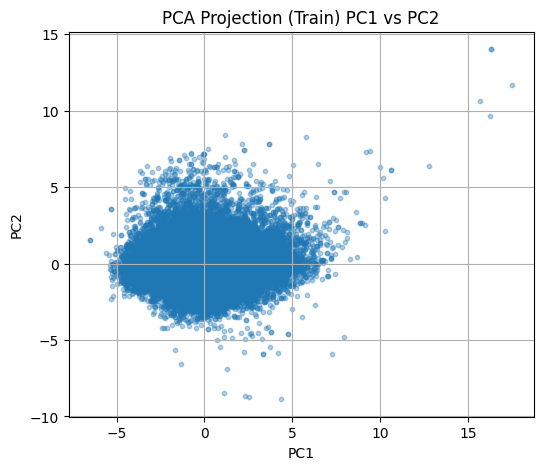

In [ ]:
# PCA 2D projection (train)
plt.figure(figsize=(6,5))
plt.scatter(X_train_pca_df['PC1'], X_train_pca_df['PC2'], s=10, alpha=0.35)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA Projection (Train) PC1 vs PC2')
plt.grid(True)
plt.show()


=== Logistic Regression (Baseline) ===
Accuracy : 0.7186097216878287
Precision: 0.6297443841982959
Recall   : 0.5677374301675978
F1 Score : 0.5971355123026074

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      4933
           1       0.63      0.57      0.60      2864

    accuracy                           0.72      7797
   macro avg       0.70      0.69      0.69      7797
weighted avg       0.71      0.72      0.72      7797



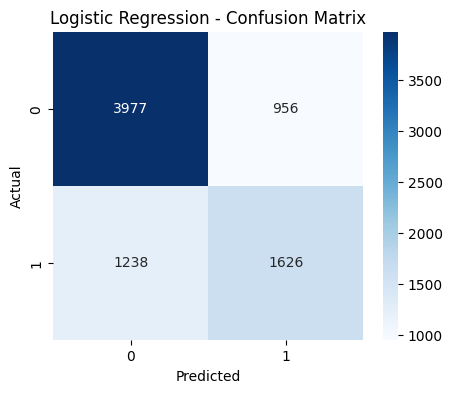

In [ ]:
# =============================
#  BASELINE MODEL: LOGISTIC REGRESSION
# =============================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train Logistic Regression on PCA components
log_reg = LogisticRegression(max_iter=2000, n_jobs=-1)
log_reg.fit(X_train_pca, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test_pca)

# Evaluation metrics
log_acc  = accuracy_score(y_test, y_pred_log)
log_prec = precision_score(y_test, y_pred_log)
log_rec  = recall_score(y_test, y_pred_log)
log_f1   = f1_score(y_test, y_pred_log)

print("=== Logistic Regression (Baseline) ===")
print("Accuracy :", log_acc)
print("Precision:", log_prec)
print("Recall   :", log_rec)
print("F1 Score :", log_f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train SVM with RBF kernel
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train_pca, y_train)

# Predictions
y_pred_svm = svm_clf.predict(X_test_pca)

# Metrics
acc = accuracy_score(y_test, y_pred_svm)
prec = precision_score(y_test, y_pred_svm)
rec = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print("=== SVM (Baseline) ===")
print(f"Accuracy : {acc}")
print(f"Precision: {prec}")
print(f"Recall   : {rec}")
print(f"F1 Score : {f1}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


=== SVM (Baseline) ===
Accuracy : 0.7515711170963191
Precision: 0.6646536412078152
Recall   : 0.653282122905028
F1 Score : 0.6589188237365733

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      4933
           1       0.66      0.65      0.66      2864

    accuracy                           0.75      7797
   macro avg       0.73      0.73      0.73      7797
weighted avg       0.75      0.75      0.75      7797



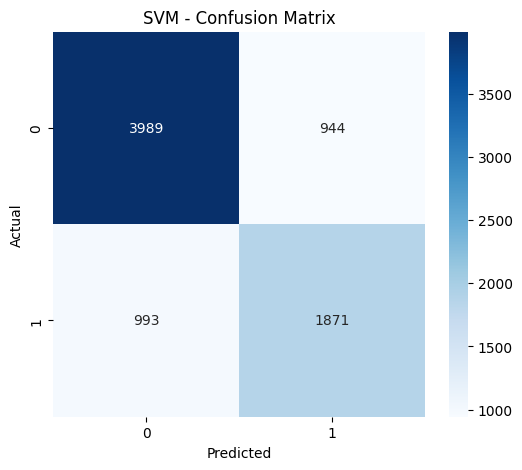

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Nueral Network

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=300
)

mlp_clf.fit(X_train_pca, y_train)

# Predictions
y_pred_mlp = mlp_clf.predict(X_test_pca)

# Metrics
acc = accuracy_score(y_test, y_pred_mlp)
prec = precision_score(y_test, y_pred_mlp)
rec = recall_score(y_test, y_pred_mlp)
f1 = f1_score(y_test, y_pred_mlp)

print("=== Neural Network (Baseline) ===")
print(f"Accuracy : {acc}")
print(f"Precision: {prec}")
print(f"Recall   : {rec}")
print(f"F1 Score : {f1}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))


=== Neural Network (Baseline) ===
Accuracy : 0.7357958189047069
Precision: 0.6400696864111498
Recall   : 0.6414106145251397
F1 Score : 0.6407394489012905

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      4933
           1       0.64      0.64      0.64      2864

    accuracy                           0.74      7797
   macro avg       0.72      0.72      0.72      7797
weighted avg       0.74      0.74      0.74      7797



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


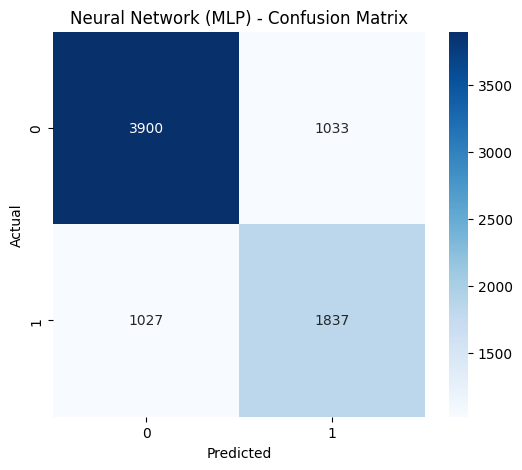

In [ ]:
cm = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Neural Network (MLP) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Tuning

Logistic


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver


=== Tuned Logistic Regression ===
Best Params: {'solver': 'liblinear', 'penalty': 'l2', 'l1_ratio': 0.75, 'class_weight': 'balanced', 'C': 0.001}
Accuracy : 0.7055277670899064
Precision: 0.5717171717171717
Recall   : 0.7905027932960894
F1 Score : 0.6635404454865181

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.66      0.74      4933
           1       0.57      0.79      0.66      2864

    accuracy                           0.71      7797
   macro avg       0.71      0.72      0.70      7797
weighted avg       0.74      0.71      0.71      7797



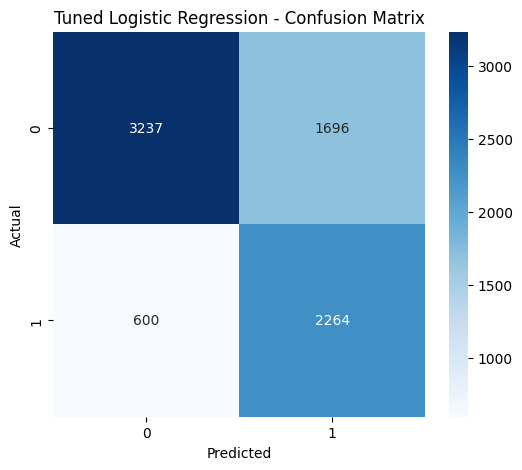

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------
# TUNED LOGISTIC REGRESSION
# -----------------------

param_dist = {
    "C": [0.001, 0.01, 0.1, 1, 10, 50, 100],
    "penalty": ["l2", "elasticnet"],
    "solver": ["saga", "liblinear"],
    "class_weight": [None, "balanced"],
    "l1_ratio": [0.0, 0.25, 0.5, 0.75, 1.0]  # only used when elasticnet
}

log_reg = LogisticRegression(max_iter=5000)

search_lr = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=20,
    scoring="f1",
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search_lr.fit(X_train_pca, y_train)

best_lr = search_lr.best_estimator_

# Predictions
y_pred_lr_tuned = best_lr.predict(X_test_pca)

# Metrics
acc = accuracy_score(y_test, y_pred_lr_tuned)
prec = precision_score(y_test, y_pred_lr_tuned)
rec = recall_score(y_test, y_pred_lr_tuned)
f1 = f1_score(y_test, y_pred_lr_tuned)

print("\n=== Tuned Logistic Regression ===")
print("Best Params:", search_lr.best_params_)
print(f"Accuracy : {acc}")
print(f"Precision: {prec}")
print(f"Recall   : {rec}")
print(f"F1 Score : {f1}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr_tuned))

# -----------------------
# CONFUSION MATRIX
# -----------------------
cm = confusion_matrix(y_test, y_pred_lr_tuned)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Tuned Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


SVm


Fitting 2 folds for each of 15 candidates, totalling 30 fits
Best Params: {'C': np.float64(4.418441521199722), 'class_weight': None, 'gamma': np.float64(0.017885301261862014), 'kernel': 'rbf'}
Accuracy : 0.751186353725792
Precision: 0.6648822269807281
Recall   : 0.6504888268156425
F1 Score : 0.6576067772679138

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      4933
           1       0.66      0.65      0.66      2864

    accuracy                           0.75      7797
   macro avg       0.73      0.73      0.73      7797
weighted avg       0.75      0.75      0.75      7797



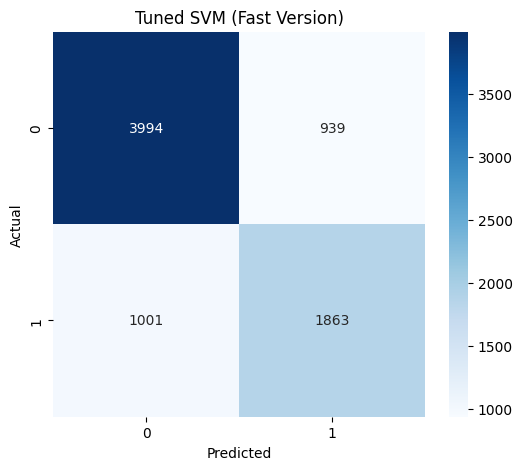

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
import numpy as np

param_dist = {
    'C': loguniform(1e-3, 1e3),
    'gamma': loguniform(1e-4, 1e1),
    'kernel': ['rbf'],
    'class_weight': [None, 'balanced']
}

svm = SVC()

random_svm = RandomizedSearchCV(
    svm,
    param_distributions=param_dist,
    n_iter=15,           # only 15 combinations
    cv=2,                # faster than cv=3
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_svm.fit(X_train_pca, y_train)

best_svm = random_svm.best_estimator_
print("Best Params:", random_svm.best_params_)

# Evaluate
y_pred_svm = best_svm.predict(X_test_pca)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall   :", recall_score(y_test, y_pred_svm))
print("F1 Score :", f1_score(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Tuned SVM (Fast Version)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


NN

Fitting 2 folds for each of 15 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Params: {'learning_rate_init': np.float64(0.003593813663804626), 'hidden_layer_sizes': (50,), 'alpha': np.float64(0.046415888336127774), 'activation': 'relu'}

=== Tuned Neural Network ===
Accuracy : 0.7499038091573682
Precision: 0.6575862068965517
Recall   : 0.6658519553072626
F1 Score : 0.6616932685634975

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      4933
           1       0.66      0.67      0.66      2864

    accuracy                           0.75      7797
   macro avg       0.73      0.73      0.73      7797
weighted avg       0.75      0.75      0.75      7797



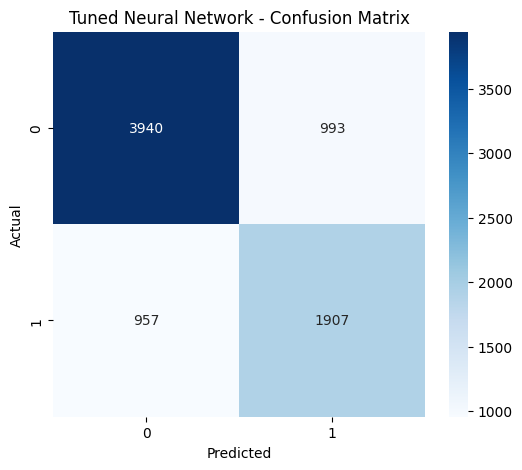

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---------------------------------------------------
#   Tuned Neural Network (Fast Randomized Search)
# ---------------------------------------------------

param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
    'activation': ['relu', 'tanh'],
    'alpha': np.logspace(-4, -1, 10),
    'learning_rate_init': np.logspace(-4, -2, 10)
}

mlp = MLPClassifier(
    max_iter=500,
    solver='adam',
    random_state=42,
)

random_search_mlp = RandomizedSearchCV(
    mlp,
    param_dist,
    n_iter=15,         # FAST
    cv=2,              # FAST
    scoring='f1',
    verbose=1,
    random_state=42
)

random_search_mlp.fit(X_train_pca, y_train)

print("Best Params:", random_search_mlp.best_params_)

best_mlp = random_search_mlp.best_estimator_

y_pred_mlp_tuned = best_mlp.predict(X_test_pca)

print("\n=== Tuned Neural Network ===")
print("Accuracy :", accuracy_score(y_test, y_pred_mlp_tuned))
print("Precision:", precision_score(y_test, y_pred_mlp_tuned))
print("Recall   :", recall_score(y_test, y_pred_mlp_tuned))
print("F1 Score :", f1_score(y_test, y_pred_mlp_tuned))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp_tuned))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp_tuned)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Tuned Neural Network - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#  Final Model Comparison

## **Baseline Models**
| Model | Accuracy | Precision | Recall | F1 |
|-------|----------|-----------|--------|-----|
| Logistic Regression | 0.7186 | 0.6297 | 0.5677 | 0.5971 |
| **SVM (Baseline)** | **0.7516** | **0.6647** | 0.6533 | **0.6589** |
| Neural Network (Baseline) | 0.7358 | 0.6401 | 0.6414 | 0.6407 |

---

## **Tuned Models**
| Model | Accuracy | Precision | Recall | F1 |
|-------|----------|-----------|--------|-----|
| Tuned Logistic Regression | 0.7055 | 0.5717 | **0.7905** | 0.6635 |
| **Tuned SVM (Fast)** | **0.7512** | **0.6649** | 0.6505 | **0.6576** |
| Tuned Neural Network (MLP) | 0.7499 | 0.6576 | **0.6659** | **0.6617** |

---

## 🏆 **Best Model by Criteria**
- **Highest Accuracy:** SVM (≈ 0.751)  
- **Highest Recall:** Tuned Logistic Regression (0.79)  
- **Best Balanced Performance (F1):** **Tuned Neural Network (0.6617)**  
- **Most Stable Model:** SVM (Baseline or Tuned)

---

## 📄 **Final Recommendation**
The **Tuned Neural Network (MLP)** gives the **best balance** (highest F1) while maintaining strong accuracy, so it is recommended as the final model.
